# Exam 1

## Dataset 


Dataset "BusinessPlanData.dta" is based on simplified version of the dataset collected as part of the field experiment in Niger that is now published in American Economic Review.

The paper is: McKenzie, D. (2017). Identifying and spurring high-growth entrepreneurship: experimental evidence from a business plan competition. American Economic Review, 107(8), 2278-2307.
The paper and the full dataset can be found here: https://www.aeaweb.org/articles?id=10.1257/aer.20151404

Basically, the author runs a field experiment with a pool of entrepreneurs applying to a national business plan competition in Nigeria. The last stage of the selection process randomly selected 720 semi-finalists (out of 1,920 semi-finalists) to win the business plan program. The program consisted of an initial four-day training, a grant paid in four tranches, some mentoring, and two additional two-day training events. The entrepreneurs were then tracked through surveys over a period of five years.
The paper basically compares the group of semi-finalists randomly allocated to the business plan treatment (called ‘treatment’ group) to the control group of all the other semi-finalists who were not allocated to the business plan program.
The published paper looks at whether the business plan treatment had any significant effect on firms’ (self-reported) survival, profits, sales, and employment, but it also contains data on how many hours the entrepreneurs reported to work in their business in a usual week three years after the business plan competition.

Our main variable of interest (the dependent variable) for the task is the variable ‘hoursusualweek’, a continuous variable counting the number of hours that the entrepreneurs worked in a normal week three years after the intervention.

### Load BusinessPlanData data in dta format and assign it to a variable 
Hint: It is not mandatory to convert categoricals

In [130]:
data = "BusinessPLanData.dta"

In [150]:
import pandas as pd
df = pd.read_stata(data)

D:\anaconda\lib\site-packages\pandas\io\stata.py:1409: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  warnings.warn(msg, UnicodeWarning)


In [151]:
df.head()


,uid,sex_applicant,state_origin,state_residence,passfirstround,female,male,northcentral,northeastern,northwestern,...,have_satellite_dishes,region,marker_id,totalmarks,treatment,hourslastweek,hoursusualweek,hiredworkers,website,revenues
0,60803.0,Male,Akwa Ibom,Ebonyi,1.0,0.0,1.0,0.0,0.0,0.0,...,0,North-Eastern,87,38.0,0.0,NaN,NaN,NaN,NaN,NaN
1,103866.0,Male,Abia,Kaduna,1.0,0.0,1.0,0.0,0.0,1.0,...,1,North-Western,88,36.0,0.0,60.0,60.0,0.0,NaN,1600000.0
2,41190.0,Female,Kwara,Abuja,1.0,1.0,0.0,1.0,0.0,0.0,...,1,North-Central,86,49.0,0.0,NaN,NaN,NaN,NaN,NaN
3,61145.0,Male,Kogi,Abuja,1.0,0.0,1.0,1.0,0.0,0.0,...,1,North-Central,72,60.0,0.0,40.0,50.0,2.0,yes,1000000.0
4,34746.0,Male,Akwa Ibom,Akwa Ibom,1.0,0.0,1.0,0.0,0.0,0.0,...,0,South-South,90,70.0,0.0,20.0,16.0,0.0,NaN,800000.0


### Drop the columns where the type is object 

In [152]:
for i in df.columns:
    if(df[i].dtype)=='object':
        df.drop(columns=i, inplace=True)

In [153]:
df.head()

,uid,passfirstround,female,male,northcentral,northeastern,northwestern,southeastern,southsouth,southwestern,...,have_dvd_players,have_satellite_dishes,marker_id,totalmarks,treatment,hourslastweek,hoursusualweek,hiredworkers,website,revenues
0,60803.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,87,38.0,0.0,NaN,NaN,NaN,NaN,NaN
1,103866.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,1,88,36.0,0.0,60.0,60.0,0.0,NaN,1600000.0
2,41190.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,1,86,49.0,0.0,NaN,NaN,NaN,NaN,NaN
3,61145.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2,1,72,60.0,0.0,40.0,50.0,2.0,yes,1000000.0
4,34746.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,0,90,70.0,0.0,20.0,16.0,0.0,NaN,800000.0


### Drop the rows where "hoursusualweek" column is nan 

In [154]:
df = df.dropna(subset = ["hourslastweek"])
df.isnull().sum()

uid                 0
passfirstround      0
female              0
male                0
northcentral        0
                 ... 
hourslastweek       0
hoursusualweek      0
hiredworkers        0
website           243
revenues            0
Length: 74, dtype: int64

In [155]:
df.head()

,uid,passfirstround,female,male,northcentral,northeastern,northwestern,southeastern,southsouth,southwestern,...,have_dvd_players,have_satellite_dishes,marker_id,totalmarks,treatment,hourslastweek,hoursusualweek,hiredworkers,website,revenues
1,103866.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,1,88,36.0,0.0,60.0,60.0,0.0,NaN,1600000.0
3,61145.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2,1,72,60.0,0.0,40.0,50.0,2.0,yes,1000000.0
4,34746.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,0,90,70.0,0.0,20.0,16.0,0.0,NaN,800000.0
5,76658.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,72,60.0,0.0,42.0,42.0,2.0,0,1200000.0
6,57036.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,86,35.0,0.0,36.0,36.0,0.0,NaN,700000.0


### Drop the columns where input contains nan 

In [156]:
df.head()

,uid,passfirstround,female,male,northcentral,northeastern,northwestern,southeastern,southsouth,southwestern,...,have_dvd_players,have_satellite_dishes,marker_id,totalmarks,treatment,hourslastweek,hoursusualweek,hiredworkers,website,revenues
1,103866.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,1,88,36.0,0.0,60.0,60.0,0.0,NaN,1600000.0
3,61145.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2,1,72,60.0,0.0,40.0,50.0,2.0,yes,1000000.0
4,34746.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,0,90,70.0,0.0,20.0,16.0,0.0,NaN,800000.0
5,76658.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,72,60.0,0.0,42.0,42.0,2.0,0,1200000.0
6,57036.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,86,35.0,0.0,36.0,36.0,0.0,NaN,700000.0


In [157]:
a = []
for i in range(len(df)):
    a.append(i)

In [158]:
df["n"] =a

In [159]:
type(df["uid"][1])

numpy.float64

### Drop the columns which names contain "id" string 

In [160]:
df = df.where(df["uid"] != str)
df


,uid,passfirstround,female,male,northcentral,northeastern,northwestern,southeastern,southsouth,southwestern,...,have_satellite_dishes,marker_id,totalmarks,treatment,hourslastweek,hoursusualweek,hiredworkers,website,revenues,n
1,103866.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,88,36.0,0.0,60.0,60.0,0.0,NaN,1600000.0,0
3,61145.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,72,60.0,0.0,40.0,50.0,2.0,yes,1000000.0,1
4,34746.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,90,70.0,0.0,20.0,16.0,0.0,NaN,800000.0,2
5,76658.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,72,60.0,0.0,42.0,42.0,2.0,0,1200000.0,3
6,57036.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,86,35.0,0.0,36.0,36.0,0.0,NaN,700000.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1830,22502.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2,87,48.0,1.0,84.0,84.0,0.0,NaN,5000000.0,913
1831,67140.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,90,52.0,1.0,58.0,58.0,0.0,NaN,150000.0,914
1834,18080.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,90,55.0,1.0,80.0,80.0,5.0,yes,598100.0,915
1836,18221.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,90,60.0,1.0,65.0,70.0,10.0,NaN,9100000.0,916


### Use Linear Regression and VIF to drop correlated features. For VIF threshold use 5

In [161]:
df

,uid,passfirstround,female,male,northcentral,northeastern,northwestern,southeastern,southsouth,southwestern,...,have_satellite_dishes,marker_id,totalmarks,treatment,hourslastweek,hoursusualweek,hiredworkers,website,revenues,n
1,103866.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,88,36.0,0.0,60.0,60.0,0.0,NaN,1600000.0,0
3,61145.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,72,60.0,0.0,40.0,50.0,2.0,yes,1000000.0,1
4,34746.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,90,70.0,0.0,20.0,16.0,0.0,NaN,800000.0,2
5,76658.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,72,60.0,0.0,42.0,42.0,2.0,0,1200000.0,3
6,57036.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,86,35.0,0.0,36.0,36.0,0.0,NaN,700000.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1830,22502.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2,87,48.0,1.0,84.0,84.0,0.0,NaN,5000000.0,913
1831,67140.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,90,52.0,1.0,58.0,58.0,0.0,NaN,150000.0,914
1834,18080.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,90,55.0,1.0,80.0,80.0,5.0,yes,598100.0,915
1836,18221.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,90,60.0,1.0,65.0,70.0,10.0,NaN,9100000.0,916


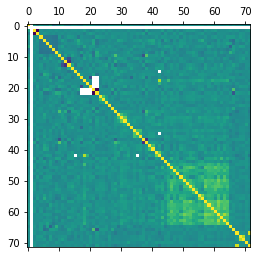

In [162]:
import matplotlib.pyplot as plt

plt.matshow(df.corr())
plt.show()

In [164]:
import pandas as pd
import numpy as np


corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

### Find the feature that has biggest Pearson correlation with dependent variable ("hoursusualweek") 

In [ ]:
df.corr

### Plot Heatmap 